In [7]:
!pip install umap-learn

     |████████████████████████████████| 81kB 5.5MB/s 
     |████████████████████████████████| 1.2MB 19.2MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=b1f2892a166c258c0cd780e9d2d6c9ab9714268597f3469d77bd519929ec8b7e
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51362 sha256=d2df0600a9beabf928df716d46e527be9388622af99a5a107b134d733841168b
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import NMF

import matplotlib as mpl

%cd /content/drive/MyDrive/CRM/

import matplotlib as mpl
mpl.font_manager.fontManager.addfont('/content/drive/MyDrive/CRM/K2D/K2D-Regular.ttf')
mpl.rc('font', family='K2D', size=12, weight=200)

/content/drive/MyDrive/CRM


In [35]:
filename = 'Customer Preference.csv'

In [62]:
df = pd.read_csv(filename)
df.head()

,ประทับเวลา,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,2564/03/20 11:53:44 ก่อนเที่ยง GMT+7,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,2564/03/20 11:54:00 ก่อนเที่ยง GMT+7,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,2564/03/20 11:54:05 ก่อนเที่ยง GMT+7,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
3,2564/03/20 11:54:12 ก่อนเที่ยง GMT+7,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
4,2564/03/20 11:54:18 ก่อนเที่ยง GMT+7,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


In [63]:
df.drop(columns=['ประทับเวลา'], axis=1, inplace=True)
df.dropna(how='all')
df.fillna('ไม่เคย', inplace=True)

In [64]:
missing = df.isnull().sum()
print(missing)

จักรยานเสือภูเขา                 0
คอลลาเจน                         0
Brownie อวกาศ                    0
แม่โขง                           0
Botox                            0
                                ..
หมอนสุขภาพสำหรับคนนอนไม่หลับ     0
อาหารแมวคลีนเพื่อสุขภาพลดหุ่น    0
น้ำส้มดีโด้                      0
Software ถูกลิขสิทธิ์            0
ครีมกันแดด                       0
Length: 61, dtype: int64


In [65]:
df.replace({'เคย': 1, 'ไม่เคย': 0}, inplace=True)
df.head()

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,1


In [66]:
purchase_per_item = pd.DataFrame(df.sum().sort_values(ascending=False)).reset_index()
purchase_per_item = purchase_per_item.set_axis(['Item','Count'], axis=1, inplace=False)
purchase_per_item = purchase_per_item.set_index('Item')

most_purchase_item = purchase_per_item[:20]
least_purchase_item = purchase_per_item[-20:]

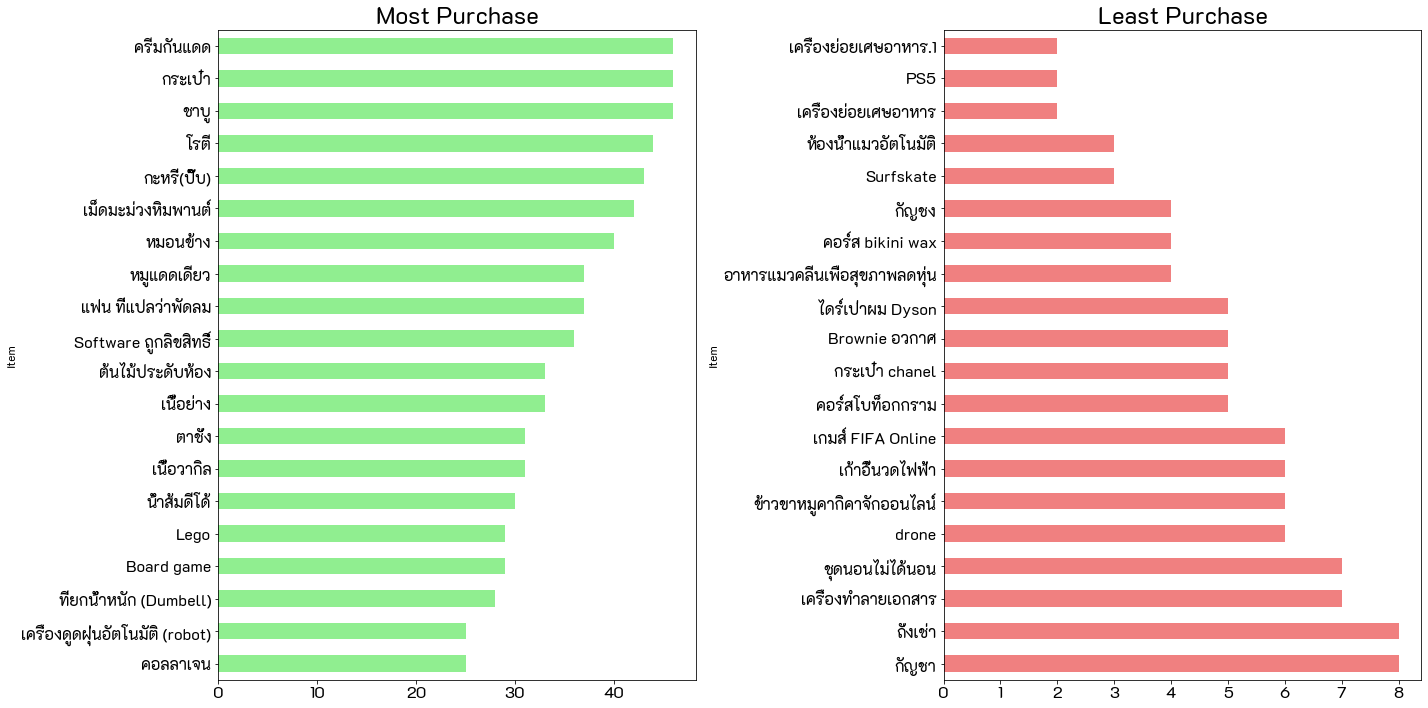

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10), tight_layout=True)
most_purchase_item.sort_values('Count', ascending=True).plot.barh(ax=axes[0], title='Most Purchase', legend=False, color='lightgreen')
least_purchase_item.plot.barh(ax=axes[1], title='Least Purchase', legend=False, color='lightcoral')
plt.rc('axes', titlesize=24)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.show()

# Association Rules

In [68]:
# calculate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
print(frequent_itemsets.shape)
frequent_itemsets.head()

(5839, 2)


,support,itemsets
0,0.543478,(คอลลาเจน)
1,0.717391,(ต้นไม้ประดับห้อง)
2,0.869565,(หมอนข้าง)
3,0.673913,(ตาชั่ง)
4,0.934783,(กะหรี่(ปั๊บ))


In [69]:
# generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
print(rules.shape)
rules.sort_values('lift',ascending=False).head(15)

(383790, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
335450,"(หมูแดดเดียว, เนื้อย่าง, ชาบู, ครีมกันแดด, Sof...","(เนื้อวากิล, เม็ดมะม่วงหิมพานต์, โรตี)",0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
334184,"(กระเป๋า, หมูแดดเดียว, เนื้อย่าง, Software ถูก...","(เนื้อวากิล, เม็ดมะม่วงหิมพานต์, ชาบู)",0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
244351,"(กระเป๋า, หมูแดดเดียว, เนื้อย่าง, ครีมกันแดด, ...","(เนื้อวากิล, เม็ดมะม่วงหิมพานต์)",0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
335461,"(หมูแดดเดียว, เนื้อย่าง, ชาบู, Software ถูกลิข...","(เนื้อวากิล, เม็ดมะม่วงหิมพานต์, ครีมกันแดด)",0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
135971,"(ครีมกันแดด, เนื้อย่าง, หมูแดดเดียว, Software ...","(เนื้อวากิล, เม็ดมะม่วงหิมพานต์)",0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
334139,"(กระเป๋า, หมูแดดเดียว, เนื้อย่าง, ชาบู, Softwa...","(เนื้อวากิล, เม็ดมะม่วงหิมพานต์)",0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
335256,"(เนื้อย่าง, กระเป๋า, หมูแดดเดียว, Software ถูก...","(เนื้อวากิล, เม็ดมะม่วงหิมพานต์, ครีมกันแดด, โ...",0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
335507,"(เนื้อย่าง, ครีมกันแดด, หมูแดดเดียว, Software ...","(เนื้อวากิล, เม็ดมะม่วงหิมพานต์, ชาบู, โรตี)",0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
244602,"(หมูแดดเดียว, เนื้อย่าง, ชาบู, Software ถูกลิข...","(เนื้อวากิล, เม็ดมะม่วงหิมพานต์)",0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
335454,"(หมูแดดเดียว, เนื้อย่าง, ครีมกันแดด, Software ...","(เนื้อวากิล, เม็ดมะม่วงหิมพานต์, ชาบู)",0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826


In [70]:
simple_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1) & (rules['lift'] > 1.05) & (rules['confidence'] > 0.5)]
print(simple_rules.shape)
simple_rules.sort_values('lift', ascending=False).head(20)

(46, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
161,(เนื้อย่าง),(เนื้อวากิล),0.717391,0.673913,0.652174,0.909091,1.348974,0.168715,3.586957
160,(เนื้อวากิล),(เนื้อย่าง),0.673913,0.717391,0.652174,0.967742,1.348974,0.168715,8.760870
18,(ต้นไม้ประดับห้อง),(Lego),0.717391,0.630435,0.543478,0.757576,1.201672,0.091210,1.524457
19,(Lego),(ต้นไม้ประดับห้อง),0.630435,0.717391,0.543478,0.862069,1.201672,0.091210,2.048913
101,(Lego),(เนื้อย่าง),0.630435,0.717391,0.521739,0.827586,1.153605,0.069471,1.639130
100,(เนื้อย่าง),(Lego),0.717391,0.630435,0.521739,0.727273,1.153605,0.069471,1.355072
159,(หมูแดดเดียว),(เนื้อวากิล),0.804348,0.673913,0.608696,0.756757,1.122929,0.066635,1.340580
158,(เนื้อวากิล),(หมูแดดเดียว),0.673913,0.804348,0.608696,0.903226,1.122929,0.066635,2.021739
170,(เนื้อวากิล),(Software ถูกลิขสิทธิ์),0.673913,0.782609,0.586957,0.870968,1.112903,0.059546,1.684783
171,(Software ถูกลิขสิทธิ์),(เนื้อวากิล),0.782609,0.673913,0.586957,0.750000,1.112903,0.059546,1.304348


In [71]:
edgelist = []
for i,x in simple_rules.iterrows():
    n1, = x['antecedents']
    n2, = x['consequents']
    attr = { 'lift': round(x['lift'],4), 'confidence' : round(x['confidence'],4) }
    edgelist.append((n1,n2,attr))

nodes = { n1 for n1, n2, attr in edgelist}.union({ n2 for n1, n2, attr in edgelist})

support_df = frequent_itemsets[frequent_itemsets['itemsets'].apply(len)==1].copy()
support_df['item'] = support_df['itemsets'].apply(lambda x: list(x)[0])
support_df = support_df[support_df['item'].isin(nodes)]

nodelist = []
for i,x in support_df.iterrows():
    n = x['item']
    attr = { 'support' : round(x['support'],4) }
    nodelist.append((n, attr))

# create graph
G = nx.DiGraph()

G.add_nodes_from(nodelist)
G.add_edges_from(edgelist)

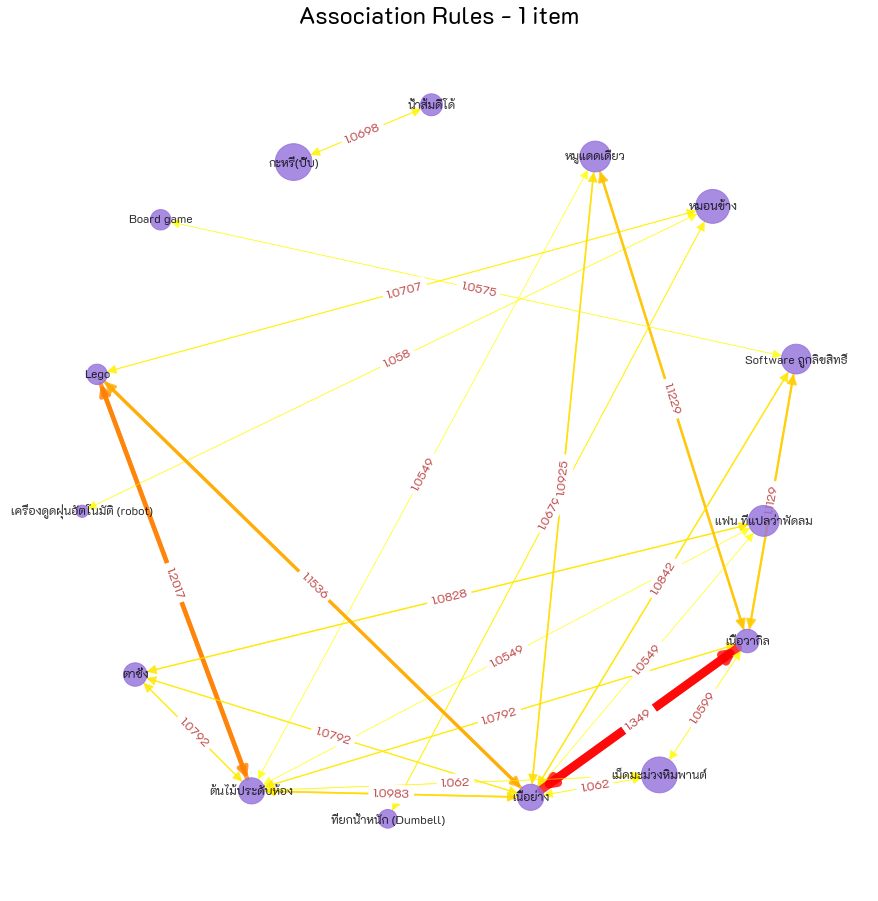

In [79]:
nodelist, node_size = zip(*[(n,d['support']) for n,d in G.nodes(data=True)])
node_size = 150 + ((np.array(node_size) - min(node_size)) / (max(node_size) - min(node_size)))*1200
edgelist, width = zip(*[((u,v), d['lift'])for u,v,d in G.edges(data=True)])

width = .5 + ((np.array(width) - min(width)) / (max(width) - min(width)))*8

labels_params = {'font_family': 'K2D', 'alpha':.8, 'font_size':12}

plt.figure(figsize=(12,12))

# pos = nx.spring_layout(G, k=5, weight='lift', iterations=120, seed=120, scale=2.5)
pos = nx.spring_layout(G, k=5, weight='lift', iterations=80, seed=90, scale=2.5)
nx.draw(G, pos, with_labels=True, arrowsize=20, 
        edgelist=edgelist, width=width, edge_color=width, edge_cmap=plt.cm.autumn_r, #edge_color='.75',
        nodelist=nodelist, node_size=node_size, node_color='mediumpurple', 
        **labels_params)
edge_labels = nx.get_edge_attributes(G, 'lift')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='firebrick',  **labels_params)

plt.title('Association Rules - 1 item')
# plt.savefig('plots/association-rules-1.jpg', dpi=120)
plt.show()

# Collaborative Filtering

In [91]:
X = df.T
item_names = df.columns
item_sim = cosine_similarity(X)
item_sim = pd.DataFrame(item_sim, index=item_names, columns=item_names)
item_sim = item_sim.unstack().reset_index()
item_sim.columns = ['item1','item2','sim']

In [92]:
sim_threshold = 0.65
sim_df = item_sim[item_sim.apply(lambda x: x['item1']!=x['item2'], axis=1) & item_sim['sim'].between(sim_threshold, 1)]
sim_df.sort_values('sim', ascending=False)

,item1,item2,sim
2161,เครื่องย่อยเศษอาหาร.1,เครื่องย่อยเศษอาหาร,1.000000
1621,เครื่องย่อยเศษอาหาร,เครื่องย่อยเศษอาหาร.1,1.000000
1923,กระเป๋า,ชาบู,1.000000
3691,ครีมกันแดด,กระเป๋า,1.000000
3692,ครีมกันแดด,ชาบู,1.000000
...,...,...,...
2369,เม็ดมะม่วงหิมพานต์,มะม่วงเบา,0.654654
2424,ไฟอัจฉริยะ,เครื่องตรวจน้ำตาลในเลือด,0.653197
2784,เครื่องตรวจน้ำตาลในเลือด,ไฟอัจฉริยะ,0.653197
739,หมอนข้าง,เครื่องวัดความดัน,0.652929


Name: 
Type: Graph
Number of nodes: 44
Number of edges: 192
Average degree:   8.7273


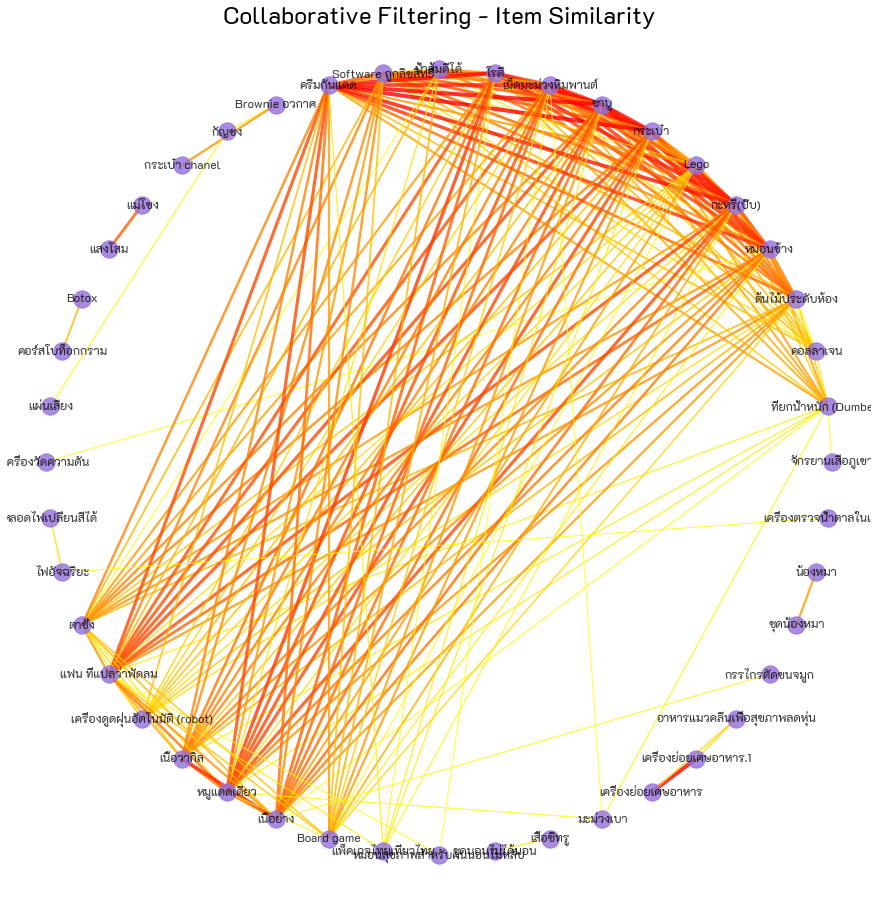

In [93]:
G = nx.Graph()
G.add_weighted_edges_from([ (x['item1'],x['item2'], round(x['sim'],2)) for i,x in sim_df.iterrows()])
print(nx.info(G))
labels_params = {'font_family': 'K2D', 'alpha':.8, 'font_size':12}

edgelist, weights = zip(*[((u,v), d['weight'])for u,v,d in G.edges(data=True)])
width = 1 + ((np.array(weights) - min(weights)) / (max(weights) - min(weights)))*3

plt.figure(figsize=(12,12))
pos = nx.circular_layout(G, scale=5)
nx.draw(G, pos, with_labels=True, node_color='mediumpurple', 
        edgelist=edgelist, width=width, 
        edge_color=weights, edge_cmap=plt.cm.autumn_r,
        **labels_params)
plt.title('Collaborative Filtering - Item Similarity')
# plt.savefig('./plots/item_sim.png', dpi=120)
plt.show()